# Wine Quality Prediction Project 

#### By using machine learning for wine quality prediction enhances operational efficiency, provides objective information to consumers, and supports decision-making in the wine industry. In this project I am using the wine quality dataset available on Kaggle for free.

#### https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download&select=WineQT.csv


## Objective

#### Predict whether a wine is of good or bad quality based on factors such as chemical composition and other relevant attributes.

#### The main idea is to predict wine quality by applying a Deep Neural Network model.

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import SMOTE



In [138]:
df = pd.read_csv('WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [139]:
# type of data present in each of the columns present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB



#### Dataset consists of 1143 rows and 13 columns. Data type of almost variable are float

In [140]:
#descriptive statistical measures of the dataset.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Data Processing

In [141]:
# df['quality'] = df.quality.apply(lambda x:2 if x>6 else 0 if x<=5 else 1 )
df['quality'] = df.quality.apply(lambda x:1 if x>6 else 0 )


In [142]:
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

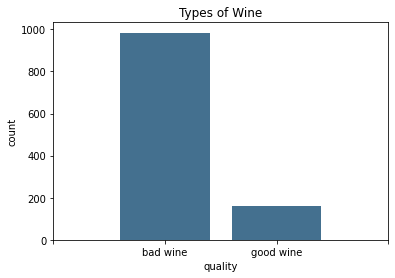

In [143]:
# Plot quality classification 
      
df['quality'].value_counts()
      
plt.figure(num=None)
sb.countplot(data = df, x = 'quality', saturation=0.5)
plt.title("Types of Wine")
plt.xticks([-1,0,1,2], ['','bad wine','good wine', ''])
plt.show()

# Deep Neural Network

In [144]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score

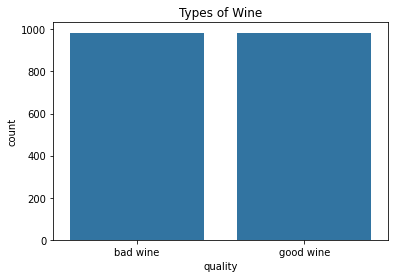

In [145]:

# Define features and target
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Apply SMOTE
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

# Plot the results
sns.countplot(x=y_ros)
plt.xticks([0, 1], ['bad wine', 'good wine'])
plt.title("Types of Wine")
plt.show()


In [146]:
# split dataset to train and test variable 
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape


((1574, 11), (394, 11))

In [147]:
# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## Deep Neural Network model

In [148]:

# Crear el modelo secuencial
model = Sequential()

# Añadir capas densas
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001),input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='sigmoid'))  # 1 nodo de salida para clasificación binaria


# Definir el learning rate
learning_rate = 0.0001

# Compilar el modelo con el optimizador Adam y el learning rate especificado

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5)


# Definir EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), 
                  callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# Calculate predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias
train_preds_bin = (train_preds > 0.5).astype(int)
val_preds_bin = (val_preds > 0.5).astype(int)

# Calcular la precisión de entrenamiento y validación
print(f'Training Accuracy: {metrics.accuracy_score(y_train, train_preds_bin):.4f}')
print(f'Validation Accuracy: {metrics.accuracy_score(y_test, val_preds_bin):.4f}')
print()


Epoch 1/1000
25/25 [==============================] - 2s 13ms/step - loss: 1.0697 - accuracy: 0.4867 - val_loss: 0.7446 - val_accuracy: 0.6041 - lr: 1.0000e-04
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0051 - accuracy: 0.5121 - val_loss: 0.7316 - val_accuracy: 0.6193 - lr: 1.0000e-04
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9532 - accuracy: 0.5178 - val_loss: 0.7308 - val_accuracy: 0.6421 - lr: 1.0000e-04
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9237 - accuracy: 0.5483 - val_loss: 0.7336 - val_accuracy: 0.6117 - lr: 1.0000e-04
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8699 - accuracy: 0.5724 - val_loss: 0.7267 - val_accuracy: 0.5888 - lr: 1.0000e-04
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8337 - accuracy: 0.5839 - val_loss: 0.7129 - val_accuracy: 0.6193 - lr: 1.0000e-04
Epoch 7/1000
25/25 [=========================

25/25 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.8056 - val_loss: 0.4788 - val_accuracy: 0.8122 - lr: 1.0000e-04
Epoch 53/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7942 - val_loss: 0.4840 - val_accuracy: 0.8071 - lr: 1.0000e-04
Epoch 54/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.8139 - val_loss: 0.5182 - val_accuracy: 0.7944 - lr: 1.0000e-04
Epoch 55/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.8056 - val_loss: 0.5039 - val_accuracy: 0.7970 - lr: 1.0000e-04
Epoch 56/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.8100 - val_loss: 0.4749 - val_accuracy: 0.8147 - lr: 1.0000e-04
Epoch 57/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7821 - val_loss: 0.4857 - val_accuracy: 0.8122 - lr: 1.0000e-04
Epoch 58/1000
25/25 [==============================] -

25/25 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8437 - val_loss: 0.4261 - val_accuracy: 0.8426 - lr: 1.0000e-04
Epoch 104/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8463 - val_loss: 0.4252 - val_accuracy: 0.8376 - lr: 1.0000e-04
Epoch 105/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8482 - val_loss: 0.4540 - val_accuracy: 0.8528 - lr: 1.0000e-04
Epoch 106/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8551 - val_loss: 0.4300 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 107/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8596 - val_loss: 0.4350 - val_accuracy: 0.8503 - lr: 1.0000e-04
Epoch 108/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.8431 - val_loss: 0.4341 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 109/1000
25/25 [===========================

Epoch 154/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3894 - accuracy: 0.8602 - val_loss: 0.4043 - val_accuracy: 0.8680 - lr: 1.0000e-04
Epoch 155/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3854 - accuracy: 0.8513 - val_loss: 0.3925 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 156/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8748 - val_loss: 0.4078 - val_accuracy: 0.8655 - lr: 1.0000e-04
Epoch 157/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3933 - accuracy: 0.8659 - val_loss: 0.4032 - val_accuracy: 0.8782 - lr: 1.0000e-04
Epoch 158/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.8551 - val_loss: 0.4089 - val_accuracy: 0.8629 - lr: 1.0000e-04
Epoch 159/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8571 - val_loss: 0.3848 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 160/1000
25/25 [============

Epoch 205/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3626 - accuracy: 0.8723 - val_loss: 0.4012 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 206/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8659 - val_loss: 0.3906 - val_accuracy: 0.8807 - lr: 1.0000e-04
Epoch 207/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8748 - val_loss: 0.3827 - val_accuracy: 0.8832 - lr: 1.0000e-04
Epoch 208/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8748 - val_loss: 0.3778 - val_accuracy: 0.8832 - lr: 1.0000e-04
Epoch 209/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3864 - accuracy: 0.8621 - val_loss: 0.3834 - val_accuracy: 0.8782 - lr: 5.0000e-05
Epoch 210/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.8717 - val_loss: 0.3729 - val_accuracy: 0.8832 - lr: 5.0000e-05
Epoch 211/1000
25/25 [============

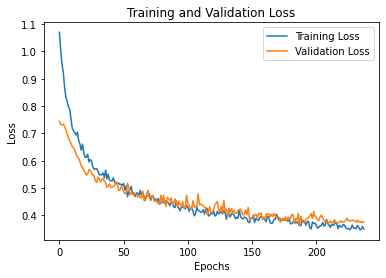

In [149]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

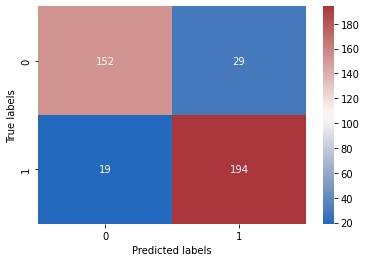

In [150]:
# Visualizing confusion matrix
conf_matrix = confusion_matrix(y_test, val_preds_bin)

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [151]:
# Print the classification report for the best performing model.

print(metrics.classification_report(y_test,val_preds_bin))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       181
           1       0.87      0.91      0.89       213

    accuracy                           0.88       394
   macro avg       0.88      0.88      0.88       394
weighted avg       0.88      0.88      0.88       394



In [152]:
# Save the model
model.save('dnn_model.h5')

# Load the model
#loaded_model = tf.keras.models.load_model('my_model.h5')
